In [1]:
import pandas as pd
listings = pd.read_csv('listings-masters-modeling.csv', error_bad_lines=False, engine="python")
listings

,id,listing_url,name,description,picture_url,hostid,host_since,host_response_time,host_response_rate,host_acceptance_rate,superhost,host_listings_count,host_identity_verified,neighbourhoodid,borough_id,latitude,longitude,room_typeid,accommodates,bathrooms_text,bathrooms,bedrooms,beds,amenities,amenities_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,2595,https://www.airbnb.com/rooms/2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",https://a0.muscache.com/pictures/f0813a11-40b2...,2845,9/9/2008,within a few hours,0.92,0.25,0.0,6.0,True,115,3,40.75362,-73.98377,1,2,1 bath,1.0,NaN,1.0,"[""Hot water"", ""Extra pillows and blankets"", ""O...",31,175,30,1125,30,60,90,365,48,94.0,9.0,9.0,10.0,10.0,9.0,0
1,3831,https://www.airbnb.com/rooms/3831,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,12/7/2008,within an hour,0.95,0.93,0.0,1.0,True,63,2,40.68514,-73.95976,1,3,1 bath,1.0,1.0,3.0,"[""Hot water"", ""Shampoo"", ""Baby safety gates"", ...",35,74,1,730,12,31,61,307,375,89.0,9.0,9.0,9.0,10.0,10.0,0
2,5121,https://www.airbnb.com/rooms/5121,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,https://a0.muscache.com/pictures/2090980c-b68e...,7356,2/3/2009,,0.00,0.00,0.0,1.0,True,52,2,40.68688,-73.95596,2,2,NaN,NaN,1.0,1.0,"[""Wifi"", ""Kitchen"", ""Heating"", ""Air conditioni...",4,60,30,730,30,60,90,365,50,90.0,8.0,8.0,10.0,9.0,9.0,0
3,5178,https://www.airbnb.com/rooms/5178,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,https://a0.muscache.com/pictures/12065/f070997...,8967,3/3/2009,within a day,1.00,1.00,0.0,1.0,False,115,3,40.76468,-73.98315,2,2,1 bath,1.0,1.0,1.0,"[""Wifi"", ""Heating"", ""Refrigerator"", ""Shampoo"",...",18,65,2,14,0,0,0,0,474,84.0,9.0,8.0,9.0,10.0,9.0,0
4,279857,https://www.airbnb.com/rooms/279857,Entire Home w 8 BR /5 Bath No share Yellow Block,As seen on The Net Flix Show Stay Here Show 4 ...,https://a0.muscache.com/pictures/4b888435-e2ea...,1420300,11/18/2011,within an hour,1.00,0.96,1.0,1.0,True,52,2,40.68492,-73.95489,2,16,5 baths,5.0,8.0,18.0,"[""Hot water"", ""Crib"", ""Shampoo"", ""Oven"", ""Extr...",45,650,1,29,25,55,85,347,140,97.0,10.0,10.0,10.0,10.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,46937371,https://www.airbnb.com/rooms/46937371,Gramercy Loft-Studio/Prime Location ~W&D in unit~,This AMAZING ALL Brand NEW **5 Star quality** ...,https://a0.muscache.com/pictures/a70776a5-f510...,27181542,2/3/2015,within an hour,1.00,1.00,0.0,10.0,True,111,3,40.73961,-73.97971,1,2,1 bath,1.0,NaN,1.0,"[""Hot water"", ""Oven"", ""Iron"", ""Washer"", ""Long ...",30,199,30,365,30,60,90,180,0,NaN,NaN,NaN,NaN,NaN,NaN,0
36919,46937954,https://www.airbnb.com/rooms/46937954,Upper West Side Penthouse- Terrace & Hidden Ga...,"Bright, sunny and well-maintained Penthouse wi...",https://a0.muscache.com/pictures/5962e4a1-a1a9...,287807769,8/21/2019,,0.00,0.00,0.0,0.0,True,127,3,40.78061,-73.98514,1,3,1 bath,1.0,1.0,1.0,"[""First aid kit"", ""Wifi"", ""Heating"", ""Shampoo""...",16,205,30,1125,23,53,83,83,0,NaN,NaN,NaN,NaN,NaN,NaN,0
36920,46938514,https://www.airbnb.com/rooms/46938514,Cozy shared room in East Harlem,"""Common area with twin day bed in the ""El Ba...",https://a0.muscache.com/pictures/94c199b0-5262...,303319010,10/19/2019,,0.00,1.00,1.0,0.0,True,102,3,40.80054,-73.93340,4,1,1 shared bath,1.0,1.0,0.0,"[""Wifi"", ""First aid kit"", ""Heating"", ""Essentia...",10,35,1,28,26,56,86,176,0,NaN,NaN,NaN,NaN,NaN,NaN,0
36921,46938537,https://www.airbnb.com/rooms/46938537,Boho

In [2]:
listings.columns

Index(['id', 'listing_url', 'name', 'description', 'picture_url', 'hostid',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'superhost', 'host_listings_count',
       'host_identity_verified', 'neighbourhoodid', 'borough_id', 'latitude',
       'longitude', 'room_typeid', 'accommodates', 'bathrooms_text',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'amenities_count',
       'price', 'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [3]:
useless = ['id', 'listing_url', 'name', 'description', 'picture_url', 'hostid', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_identity_verified', 'bathrooms_text', 'amenities']
listings.drop(useless, axis=1, inplace=True)

In [4]:
reviews_scores = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location',
                  'review_scores_value']
listings.drop(reviews_scores, axis=1, inplace=True)


In [5]:
#Do Correlation matrix

features_correlation = listings.corr()
features_correlation

,superhost,host_listings_count,neighbourhoodid,borough_id,latitude,longitude,room_typeid,accommodates,bathrooms,bedrooms,beds,amenities_count,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable
superhost,1.000000,-0.047797,-0.014438,-0.008271,-0.036721,0.093110,-0.026010,0.075206,-0.002456,0.042684,0.075138,0.352536,-0.006701,-0.124770,-0.002569,0.080561,0.105754,0.119224,0.122061,0.336696,0.192755,-0.019285
host_listings_count,-0.047797,1.000000,0.059862,0.062502,0.042684,-0.078780,-0.084246,-0.011909,-0.003984,-0.011418,-0.024941,0.091064,0.045185,0.025191,-0.000754,-0.015347,0.001431,0.013150,0.090749,-0.061490,-0.032754,0.136190
neighbourhoodid,-0.014438,0.059862,1.000000,0.915557,0.227423,0.087298,-0.000654,-0.011879,-0.040061,-0.018362,-0.001502,-0.016005,0.040698,0.011292,0.003719,0.041851,0.050815,0.053695,0.046428,-0.023359,-0.027290,0.010808
borough_id,-0.008271,0.062502,0.915557,1.000000,0.252544,0.121006,0.018544,-0.012181,-0.034274,-0.026160,0.000501,-0.001958,0.035141,0.003857,0.002013,0.073686,0.081067,0.083284,0.071291,-0.009497,-0.042411,0.030997
latitude,-0.036721,0.042684,0.227423,0.252544,1.000000,0.078557,0.017883,-0.041920,-0.046008,-0.066552,-0.047892,-0.032060,0.027140,0.039236,0.005800,0.025189,0.022081,0.020215,0.022459,-0.039081,-0.025135,0.025976
longitude,0.093110,-0.078780,0.087298,0.121006,0.078557,1.000000,0.151420,-0.009069,-0.002626,-0.005244,0.021953,0.051442,-0.104938,-0.069121,-0.002919,0.072594,0.092744,0.102108,0.068442,0.075107,-0.016158,0.010578
room_typeid,-0.026010,-0.084246,-0.000654,0.018544,0.017883,0.151420,1.000000,-0.415664,-0.012461,-0.334723,-0.247367,-0.127699,-0.154897,-0.044619,-0.004394,0.064990,0.053621,0.044668,0.014512,0.001098,-0.085884,0.082826
accommodates,0.075206,-0.011909,-0.011879,-0.012181,-0.041920,-0.009069,-0.415664,1.000000,0.354395,0.734081,0.727378,0.236268,0.291220,-0.056165,-0.005123,0.075752,0.080578,0.084523,0.113862,0.070541,-0.006373,0.005569
bathrooms,-0.002456,-0.003984,-0.040061,-0.034274,-0.046008,-0.002626,-0.012461,0.354395,1.000000,0.470009,0.387607,0.122436,0.214580,0.000572,-0.001800,0.056945,0.060411,0.061805,0.089193,-0.042190,-0.024918,0.020238
bedrooms,0.042684,-0.011418,-0.018362,-0.026160,-0.066552,-0.005244,-0.334723,0.734081,0.470009,1.000000,0.724734,0.164863,0.267511,-0.011709,0.001955,0.065679,0.069010,0.072256,0.095700,-0.000325,0.008595,-0.033350


In [8]:
features_correlation.to_csv("features_correlation.csv")

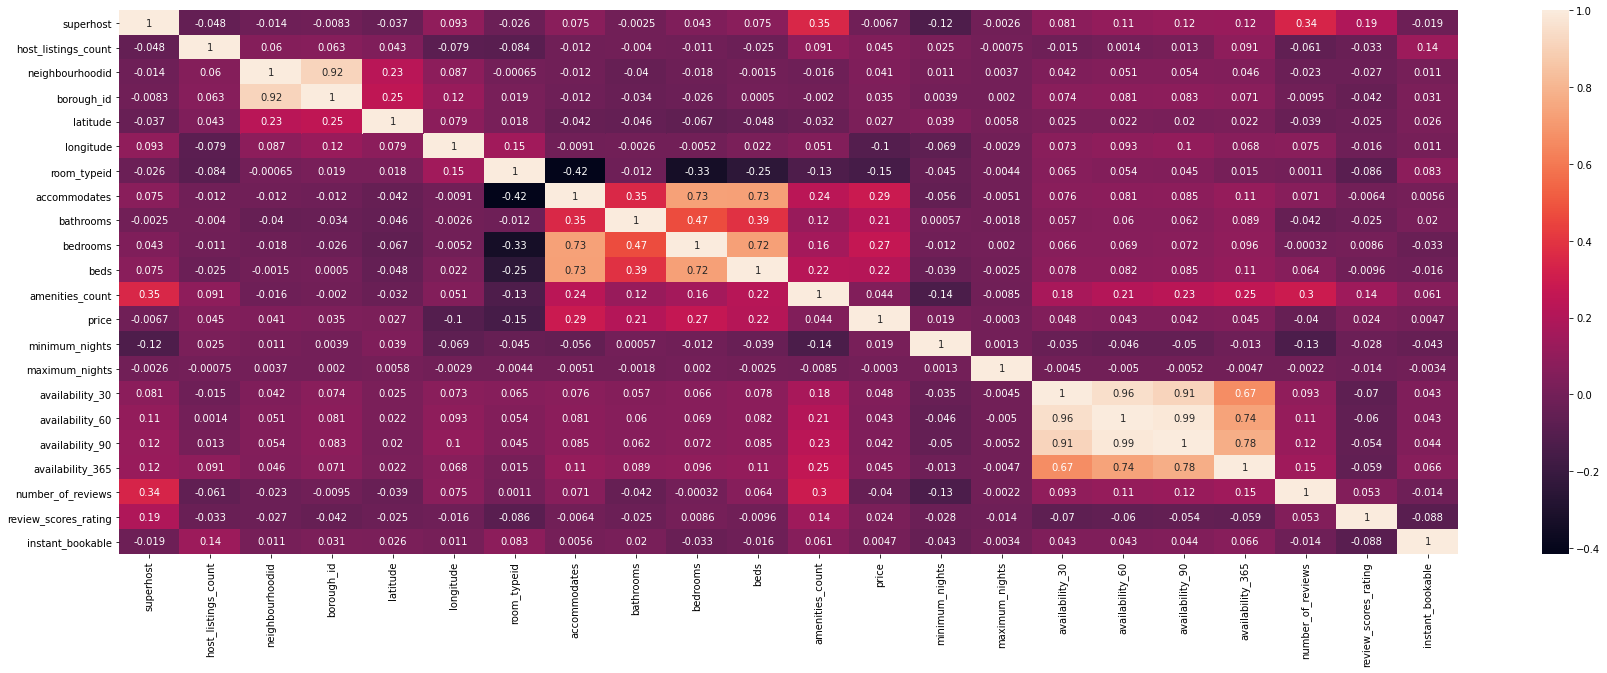

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
sns.heatmap(listings.corr(), annot= True)

In [7]:
selected_features = listings.drop("price", axis=1)
selected_features

,superhost,host_listings_count,neighbourhoodid,borough_id,latitude,longitude,room_typeid,accommodates,bathrooms,bedrooms,beds,amenities_count,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable
0,0.0,6.0,115,3,40.75362,-73.98377,1,2,1.0,NaN,1.0,31,30,1125,30,60,90,365,48,94.0,0
1,0.0,1.0,63,2,40.68514,-73.95976,1,3,1.0,1.0,3.0,35,1,730,12,31,61,307,375,89.0,0
2,0.0,1.0,52,2,40.68688,-73.95596,2,2,NaN,1.0,1.0,4,30,730,30,60,90,365,50,90.0,0
3,0.0,1.0,115,3,40.76468,-73.98315,2,2,1.0,1.0,1.0,18,2,14,0,0,0,0,474,84.0,0
4,1.0,1.0,52,2,40.68492,-73.95489,2,16,5.0,8.0,18.0,45,1,29,25,55,85,347,140,97.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,0.0,10.0,111,3,40.73961,-73.97971,1,2,1.0,NaN,1.0,30,30,365,30,60,90,180,0,NaN,0
36919,0.0,0.0,127,3,40.78061,-73.98514,1,3,1.0,1.0,1.0,16,30,1125,23,53,83,83,0,NaN,0
36920,1.0,0.0,102,3,40.80054,-73.93340,4,1,1.0,1.0,0.0,10,1,28,26,56,86,176,0,NaN,0
36921,0.0,1.0,111,3,40.74033,-73.98242,1,2,1.0,1.0,1.0,18,4,90,23,53,83,83,0,NaN,0


In [8]:
y = listings["price"]
X = selected_features

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train

,superhost,host_listings_count,neighbourhoodid,borough_id,latitude,longitude,room_typeid,accommodates,bathrooms,bedrooms,beds,amenities_count,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable
34516,0.0,0.0,127,3,40.79448,-73.96331,2,1,3.0,1.0,1.0,28,30,1125,30,60,90,365,0,NaN,1
11204,0.0,1.0,72,2,40.64193,-73.94378,1,8,1.0,4.0,4.0,30,2,1125,29,59,89,364,58,96.0,0
27175,0.0,1.0,108,3,40.80992,-73.94013,2,2,1.0,1.0,1.0,20,2,1125,29,59,89,364,7,100.0,0
34739,0.0,0.0,126,3,40.76714,-73.95378,2,1,1.0,1.0,0.0,10,1,1125,0,9,39,129,0,NaN,0
16930,0.0,1.0,113,3,40.71407,-73.98866,2,2,1.0,1.0,1.0,15,2,1125,0,0,0,0,2,90.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0.0,1.0,52,2,40.69864,-73.93863,2,2,1.0,1.0,1.0,14,30,31,0,0,0,0,4,100.0,0
6265,0.0,1.0,104,3,40.70668,-74.00913,1,2,1.0,NaN,1.0,1,200,1125,30,60,90,365,0,NaN,0
11284,0.0,1.0,103,3,40.72789,-73.98747,1,2,1.0,1.0,1.0,14,30,1125,0,0,0,0,4,90.0,0
860,1.0,1.0,108,3,40.82392,-73.94205,2,2,1.0,1.0,1.0,41,30,1125,0,9,39,314,189,99.0,0


In [10]:
print(X_train.shape, y_train.shape)

(27692, 21) (27692,)


In [11]:
print(X_test.shape, y_test.shape)

(9231, 21) (9231,)


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Create the pipeline (imputer + scaler + regressor)
my_pipeline_RF = make_pipeline(SimpleImputer(), StandardScaler(),
                               RandomForestRegressor(random_state=42))

# Fit the model
my_pipeline_RF.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n

In [13]:
print(my_pipeline_RF.score(X_train, y_train))
print(my_pipeline_RF.score(X_test, y_test))

0.8778911628394788
0.16466765467865252


In [15]:
importances = my_pipeline_RF.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.sort_values("importance", ascending=False)

,feature,importance
5,longitude,0.142472
4,latitude,0.122336
11,amenities_count,0.108969
12,minimum_nights,0.080504
7,accommodates,0.078198
8,bathrooms,0.067658
17,availability_365,0.055124
1,host_listings_count,0.044281
2,neighbourhoodid,0.039395
19,review_scores_rating,0.037851
